# 샘플 데이터와 Boosting Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(2021)

## 1. Data

### 1.1 Sample Data

실습에서 사용할 데이터를 생성해보겠습니다.

In [ ]:
# 하나의 변수가 있고, 변수에 따른 y값 맞추는 데이터임!
# 앞에 있는 train 영역을 이용해서 뒤에 있는 test영역 맞추는 모델 생성
data = np.linspace(0, 6, 150)[:, np.newaxis]

label = np.sin(data).ravel() + np.sin(6 * data).ravel()
noise = np.random.normal(data.shape[0]) * 0.01
label += noise

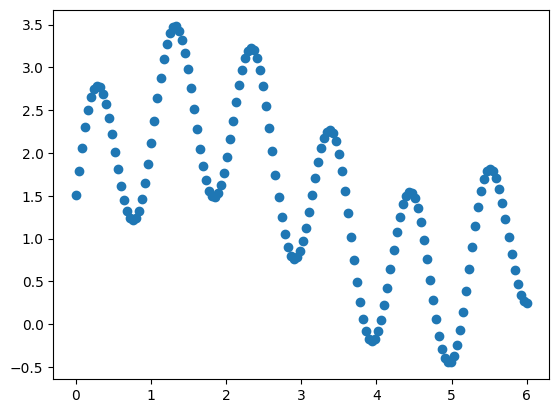

In [ ]:
plt.scatter(data, label)

### 1.2 Data Split

시계열 데이터라고 가정하고 데이터를 나누겠습니다.  

In [ ]:
train_size = 125
train_data, test_data = data[:train_size], data[train_size:]
train_label, test_label = label[:train_size], label[train_size:]

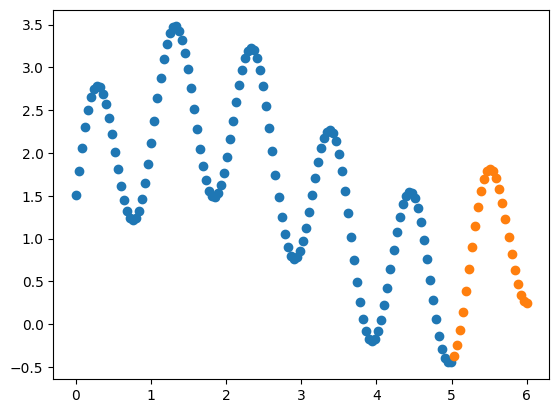

In [ ]:
plt.scatter(train_data, train_label)
plt.scatter(test_data, test_label, color="C1")

## 2. Decision Tree

우선 boosting을 사용전에 Decision Tree를 학습후 결과를 비교해 보겠습니다.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

 
tree = DecisionTreeRegressor(max_depth=2)

### 2.1 학습

In [ ]:
tree.fit(train_data, train_label)

DecisionTreeRegressor(max_depth=2)

### 2.2 예측

In [ ]:
tree_train_pred = tree.predict(train_data)
tree_test_pred = tree.predict(test_data)

### 2.3 평가

In [ ]:
# MEAN SQUARE ERROR로 평가함
from sklearn.metrics import mean_squared_error

tree_train_mse = mean_squared_error(train_label, tree_train_pred)
tree_test_mse = mean_squared_error(test_label, tree_test_pred)

In [ ]:
print(f"Tree mean squared error is {tree_train_mse:.4f}")
print(f"Tree mean squared error is {tree_test_mse:.4f}")

Tree mean squared error is 0.3669
Tree mean squared error is 1.8188


### 2.4 시각화

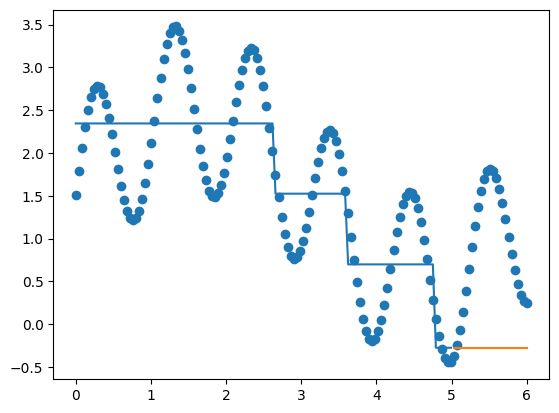

In [ ]:
plt.scatter(data, label)
plt.plot(train_data, tree_train_pred)
plt.plot(test_data, tree_test_pred)
# 파란색선이 decision tree가 예측한 값임
# test데이터의 결과는 맞추지 못하고 있음

## 3. AdaBoost

다른 모델들과는 다르게 `base_estimator`를 선언해주어야 합니다.  
가장 간단한 if else로 데이터가 분류 될 수 있도록 depth가 1인 tree로 base estimator로 만들겠습니다.

In [ ]:
from sklearn.ensemble import AdaBoostRegressor


ada_boost = AdaBoostRegressor(DecisionTreeRegressor(max_depth=1))

### 3.1 학습

In [ ]:
ada_boost.fit(train_data, train_label)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=1))

### 3.2 예측

In [ ]:
ada_boost_train_pred = ada_boost.predict(train_data)
ada_boost_test_pred = ada_boost.predict(test_data)

### 3.3 평가

In [ ]:
ada_boost_train_mse = mean_squared_error(train_label, ada_boost_train_pred)
ada_boost_test_mse = mean_squared_error(test_label, ada_boost_test_pred)

In [ ]:
print(f"Ada Boost Train mean squared error is {ada_boost_train_mse:.4f}")
print(f"Ada Boost Test mean squared error is {ada_boost_test_mse:.4f}")

Ada Boost Train mean squared error is 0.4615
Ada Boost Test mean squared error is 0.5289


### 3.4 시각화

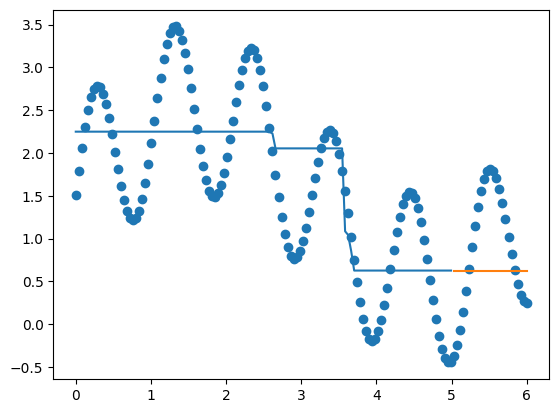

In [ ]:
plt.scatter(data, label)
plt.plot(train_data, ada_boost_train_pred)
plt.plot(test_data, ada_boost_test_pred)
# test는 가운데를 잘 예측함

## 4. GradientBoost

다음은 Gradient Boost입니다.  
Gradient Boost는 `sklearn.ensemble` 의 `GradientBoostingRegressor`로 생성할 수 있습니다.  
Gradient Boost또한 간단한 if else로 만들 수 있도록 max_depth를 1로 주겠습니다.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

grad_boost = GradientBoostingRegressor(max_depth=1)

### 4.1 학습

In [ ]:
grad_boost.fit(train_data, train_label)

GradientBoostingRegressor(max_depth=1)

### 4.2 예측

In [ ]:
grad_boost_train_pred = grad_boost.predict(train_data)
grad_boost_test_pred = grad_boost.predict(test_data)

### 4.3 평가

In [ ]:
grad_boost_train_mse = mean_squared_error(train_label, grad_boost_train_pred)
grad_boost_test_mse = mean_squared_error(test_label, grad_boost_test_pred)

In [ ]:
print(f"Gradient Boost Train mean squared error is {grad_boost_train_mse:.4f}")
print(f"Gradient Boost Test mean squared error is {grad_boost_test_mse:.4f}")

Gradient Boost Train mean squared error is 0.2767
Gradient Boost Test mean squared error is 1.3215


### 4.4 시각화

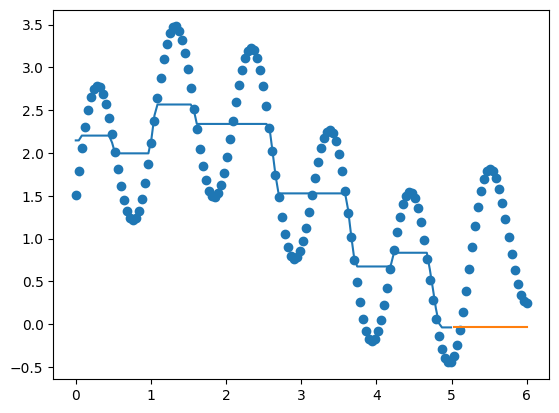

In [ ]:
plt.scatter(data, label)
plt.plot(train_data, grad_boost_train_pred)
plt.plot(test_data, grad_boost_test_pred)
# test 가운데를 잘 맞추지 못함

## 5. 마무리

In [ ]:
# train결과는 gradient boost가 제일 잘 맞춤
print(f"Tree train mean squared error is {tree_train_mse:.4f}")
print(f"Ada Boost train mean squared error is {ada_boost_train_mse:.4f}")
print(f"Gradient Boost train mean squared error is {grad_boost_train_mse:.4f}")

Tree train mean squared error is 0.3669
Ada Boost train mean squared error is 0.4615
Gradient Boost train mean squared error is 0.2767


In [ ]:
# test 결과는 Ada boost가 제일 잘 맞춤
print(f"Tree test mean squared error is {tree_test_mse:.4f}")
print(f"Ada Boost test mean squared error is {ada_boost_test_mse:.4f}")
print(f"Gradient Boost test mean squared error is {grad_boost_test_mse:.4f}")

Tree test mean squared error is 1.8188
Ada Boost test mean squared error is 0.5289
Gradient Boost test mean squared error is 1.3215


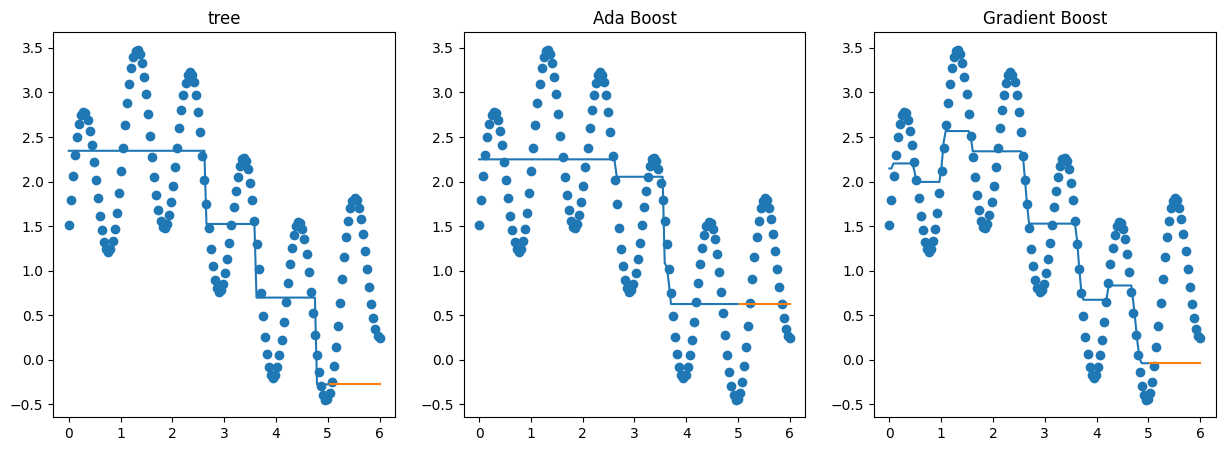

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
preds = [
    ("tree", tree_train_pred, tree_test_pred),
    ("Ada Boost", ada_boost_train_pred, ada_boost_test_pred),
    ("Gradient Boost", grad_boost_train_pred, grad_boost_test_pred)
]
for idx, (name, train_pred, test_pred) in enumerate(preds):
    ax = axes[idx]
    ax.scatter(data, label)
    ax.plot(train_data, train_pred)
    ax.plot(test_data, test_pred)
    ax.set_title(name) 

  # decision tree의 경우 예측값이 제일 밑에있고, Ada boost는 중간에서, Gradient boost는 살짝 아래서 예측함
  # Ada boost 가 제일 예측을 잘함!